In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive

In [ ]:
# df= pd.read_csv('/gdrive/My Drive/CE/dfore1150710csv.csv', low_memory=False, dtype=dtype_dict)

In [3]:
dtype_dict={'vendor': str, 'branch_id': str, 'client_account_id':str, 'payment_type': str, 'namedUser': str,
       'MonthsFirstVends': int, 'MonthsLastVends': int, 'vend30days': int, 'vend60days': int,
       'vend90days': int, 'vend180days': int, 'vend365days': int, 'vendLTD': int, 'spend30days': float,
       'spend60days': float, 'spend90days': float, 'spend180days': float, 'spend365days': float,
       'spendLTD': float}

In [4]:
df= pd.read_csv('/content/dfore1150712csv.csv', low_memory=False, dtype=dtype_dict)

In [5]:
df.shape

(1445962, 19)

In [6]:
df.isna().sum()

vendor                  0
branch_id            4882
client_account_id       0
payment_type            0
namedUser               0
MonthsFirstVends        0
MonthsLastVends         0
vend30days              0
vend60days              0
vend90days              0
vend180days             0
vend365days             0
vendLTD                 0
spend30days             0
spend60days             0
spend90days             0
spend180days            0
spend365days            0
spendLTD                0
dtype: int64

In [7]:
df=df.loc[~df.namedUser.isna()]
df=df.loc[~df.branch_id.isna()]

In [12]:
df['MoB']= df.MonthsFirstVends- df.MonthsLastVends

In [14]:
df.head()

,vendor,branch_id,client_account_id,payment_type,namedUser,MonthsFirstVends,MonthsLastVends,vend30days,vend60days,vend90days,vend180days,vend365days,vendLTD,spend30days,spend60days,spend90days,spend180days,spend365days,spendLTD,MoB
0,DI,066,6608941,LaundryCard,30300001000000436148,12,0,7,11,41,117,255,278,1620.0,2460.0,8880.0,24850.0,53995.0,58805.0,12
1,DI,016,1601433,App,384809,13,0,11,29,54,110,213,248,1650.0,4350.0,8100.0,16500.0,31950.0,37200.0,13
2,DI,021,7318316,LaundryCard,30300001000000243549,2,0,4,23,51,51,51,51,225.0,1075.0,2600.0,2600.0,2600.0,2600.0,2
3,DI,043,4301522,App,392006,14,0,4,18,26,46,74,98,600.0,2700.0,3900.0,6900.0,11100.0,14700.0,14
4,DI,021,7318301,LaundryCard,30300001000000253974,15,0,11,19,31,56,127,194,575.0,1225.0,1975.0,3575.0,7850.0,11925.0,15


In [13]:
df1= df.loc[df.vendor== 'DI']

- 0 June
- 1 May
- 2 April
- 3 March
- 4 Feb
- 5 Jan
- 6 Dec
- 7 Nov
- 8 Oct
- 9 Sept
- 10 Aug
- 11 July


In [9]:
df1= df1.loc[df1.MonthsLastVends==0]

In [10]:
df1.MoB.hist(by=df1.payment_type, bins=24, figsize=(18,7), density=True)

AttributeError: ignored

In [ ]:
df1.spend365days.describe()

count    433579.000000
mean       9997.502165
std       10402.415616
min           1.000000
25%        1925.000000
50%        6222.000000
75%       14585.000000
max       37100.000000
Name: spend365days, dtype: float64

In [ ]:
p95= df1.vend365days.describe(percentiles=[.05,.25,.50,.75,.95]).loc['95%']

In [ ]:
df1["vend365days"] = np.where(df1["vend365days"] >p95, p95,df1['vend365days'])

In [ ]:
p95= df1.spend365days.describe(percentiles=[.05,.25,.50,.75,.95]).loc['95%']
df1["spend365days"] = np.where(df1["spend365days"] >p95, p95,df1['spend365days'])

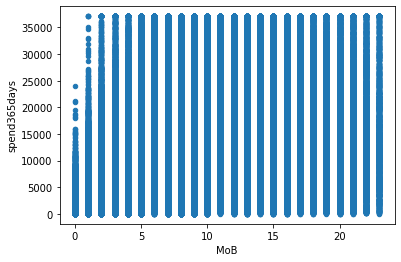

In [ ]:
df1.plot('MoB', 'spend365days', kind= 'scatter')

In [ ]:
df.spendLTD.describe(percentiles=[.95])

count    1.406698e+06
mean     6.540234e+03
std      1.309014e+04
min      1.000000e+00
50%      1.900000e+03
95%      2.790000e+04
max      3.989450e+06
Name: spendLTD, dtype: float64

In [ ]:
met_dict= {'namedUser': 'nunique', 'spendLTD': 'mean'}

In [ ]:
df.LoR.value_counts(normalize=True)

0     0.414877
1     0.105793
2     0.070061
3     0.056829
5     0.048357
4     0.045875
6     0.045100
7     0.033436
8     0.031693
9     0.027090
10    0.021584
11    0.016328
12    0.012641
15    0.011381
13    0.010612
14    0.009689
16    0.008314
17    0.006857
18    0.005819
19    0.005666
20    0.004911
21    0.003665
22    0.002295
23    0.001128
Name: LoR, dtype: float64

In [ ]:
df.groupby(['vendor', 'payment_type']).agg(met_dict)

namedUser     spendLTD
vendor payment_type                        
CSCGo  Stored-Value       4173  1575.627951
DI     App             1104809  5929.630677
       LaundryCard      220434  9741.439286

In [ ]:
df.LoR.describe()

count    1.406698e+06
mean     3.548748e+00
std      4.823689e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      6.000000e+00
max      2.300000e+01
Name: LoR, dtype: float64

In [ ]:
pd.crosstab(df.MonthsFirstVends, df.MonthsLastVends)

MonthsLastVends,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
MonthsFirstVends,,,,,,,,,,,,,,,,,,,,,,,,
0,92570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43644,42306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,32613,11107,35352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28000,8651,9206,34249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,22180,7412,5888,7152,27725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,24072,7329,5715,4945,6537,31035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,21100,5414,3593,3456,3576,7371,26726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,21593,6454,4811,3591,3459,5832,6181,26806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,22035,5418,5536,4533,3228,5157,4248,6583,26296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
